In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
password = getpass.getpass()

········


In [2]:
connection_string = "mysql+pymysql://root:" + password + "@localhost/bank"
engine=create_engine(connection_string)

query = """SELECT 
    t.type,
    t.operation,
    t.amount AS t_amount,
    t.balance,
    t.k_symbol,
    l.amount AS l_amount,
    l.duration,
    l.payments,
    l.status
FROM
    trans t
        LEFT JOIN
    loan l ON t.account_id = l.account_id;
"""

In [4]:
data = pd.read_sql_query(query, engine)

In [7]:
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,1100.0,1100.0,,96396.0,12.0,8033.0,B
1,PRIJEM,VKLAD,9900.0,11000.0,,96396.0,12.0,8033.0,B
2,PRIJEM,VKLAD,5800.0,16800.0,,96396.0,12.0,8033.0,B
3,PRIJEM,VKLAD,3300.0,20100.0,,96396.0,12.0,8033.0,B
4,VYDAJ,VYBER,16600.0,45748.0,,96396.0,12.0,8033.0,B


In [8]:
data.isna().sum()

type              0
operation         0
t_amount          0
balance           0
k_symbol          0
l_amount     711938
duration     711938
payments     711938
status       711938
dtype: int64

In [9]:
len(data)

868019

### cleaning nan values

In [14]:
data[data['duration'].isna() == False]

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,1100.0,1100.0,,96396.0,12.0,8033.0,B
1,PRIJEM,VKLAD,9900.0,11000.0,,96396.0,12.0,8033.0,B
2,PRIJEM,VKLAD,5800.0,16800.0,,96396.0,12.0,8033.0,B
3,PRIJEM,VKLAD,3300.0,20100.0,,96396.0,12.0,8033.0,B
4,VYDAJ,VYBER,16600.0,45748.0,,96396.0,12.0,8033.0,B
...,...,...,...,...,...,...,...,...,...
866977,PRIJEM,,269.6,65249.4,UROK,276084.0,36.0,7669.0,C
866978,PRIJEM,,51.1,31633.8,UROK,163332.0,36.0,4537.0,C
866979,PRIJEM,,94.1,17221.3,UROK,352704.0,48.0,7348.0,C
866980,PRIJEM,,153.4,30355.3,UROK,52512.0,12.0,4376.0,C


In [11]:
data[~data['duration'].isna()]

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,1100.0,1100.0,,96396.0,12.0,8033.0,B
1,PRIJEM,VKLAD,9900.0,11000.0,,96396.0,12.0,8033.0,B
2,PRIJEM,VKLAD,5800.0,16800.0,,96396.0,12.0,8033.0,B
3,PRIJEM,VKLAD,3300.0,20100.0,,96396.0,12.0,8033.0,B
4,VYDAJ,VYBER,16600.0,45748.0,,96396.0,12.0,8033.0,B
...,...,...,...,...,...,...,...,...,...
866977,PRIJEM,,269.6,65249.4,UROK,276084.0,36.0,7669.0,C
866978,PRIJEM,,51.1,31633.8,UROK,163332.0,36.0,4537.0,C
866979,PRIJEM,,94.1,17221.3,UROK,352704.0,48.0,7348.0,C
866980,PRIJEM,,153.4,30355.3,UROK,52512.0,12.0,4376.0,C


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868019 entries, 0 to 868018
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   type       868019 non-null  object 
 1   operation  868019 non-null  object 
 2   t_amount   868019 non-null  float64
 3   balance    868019 non-null  float64
 4   k_symbol   868019 non-null  object 
 5   l_amount   156081 non-null  float64
 6   duration   156081 non-null  float64
 7   payments   156081 non-null  float64
 8   status     156081 non-null  object 
dtypes: float64(5), object(4)
memory usage: 59.6+ MB


In [65]:
data['duration'] = data['duration'].astype('object')


### cleaning categories

In [21]:
data['operation'].value_counts()

VYBER             391903
                  183112
PREVOD NA UCET    129484
VKLAD             115624
PREVOD Z UCTU      41214
VYBER KARTOU        6682
Name: operation, dtype: int64

In [ ]:
data['operation'].apply(some_function)

In [26]:
def clean_operation(x):
    x = x.lower()
    if 'vyber' in x:
        return 'vyber'
    elif 'prevod' in x:
        return 'prevod'
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

In [25]:
data['operation']=data ['operation'].apply(clean_operation)


In [27]:
data['k_symbol'].value_counts().index

Index(['', 'UROK', 'SLUZBY', 'SIPO', ' ', 'DUCHOD', 'POJISTNE', 'UVER',
       'SANKC. UROK'],
      dtype='object')

In [28]:
def clean_ksymbol(x):
    if x in ['', ' ']:
        return 'unkown'
    else:
        return x

In [29]:
data['k_symbol']= data['k_symbol'].apply(clean_ksymbol)

In [30]:
data['k_symbol'].value_counts()

unkown         415123
UROK           183112
SLUZBY         155470
SIPO            74427
DUCHOD          19006
POJISTNE        11560
UVER             7744
SANKC. UROK      1577
Name: k_symbol, dtype: int64

In [31]:
data['k_symbol'].isin (['POJISTINE','SANKC. UROK','UVER'])

0         False
1         False
2         False
3         False
4         False
          ...  
868014    False
868015    False
868016    False
868017    False
868018    False
Name: k_symbol, Length: 868019, dtype: bool

In [33]:
def clean_type(x):
    if 'PRI' in x:
        return 'PRIJEM'
    else:
        return x
data['type'] = data['type'].apply(clean_type)

In [34]:
data['type'].value_counts()

VYDAJ     513977
PRIJEM    339950
VYBER      14092
Name: type, dtype: int64

In [ ]:
data['duration'] = data['duration'].astype('object')


### check correlations for numerical columns

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
corr_matrix=data.corr()

In [47]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [ ]:
#to reverse the coloring for ranges then you can do 'seismic.r'

<AxesSubplot:>

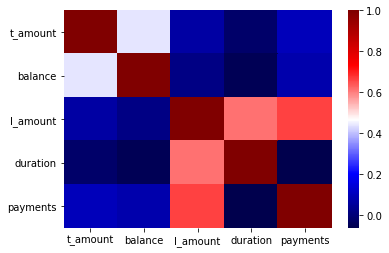

In [52]:
sns.heatmap(corr_matrix, cmap='seismic')


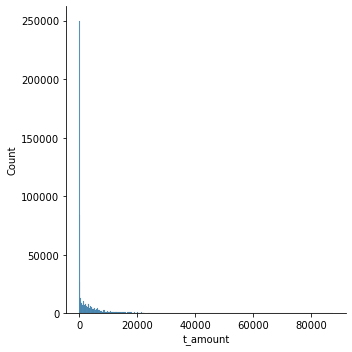

In [53]:
sns.displot(data['t_amount'])

In [54]:
data['t_amount'].describe()

count    868019.000000
mean       5430.072479
std        9381.422547
min           0.000000
25%         100.000000
50%        1380.000000
75%        6100.000000
max       87400.000000
Name: t_amount, dtype: float64

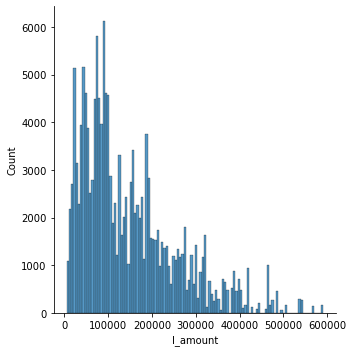

In [56]:
sns.displot(data['l_amount']) 

In [57]:
data['l_amount'].describe()

count    156081.000000
mean     146822.230995
std      109974.568837
min        4980.000000
25%       65184.000000
50%      111384.000000
75%      203940.000000
max      590820.000000
Name: l_amount, dtype: float64

In [60]:
import numpy as np
from sklearn.preprocessing import Normalizer

X=data.select_dtypes(include= np.number)

In [61]:
X.head()

,t_amount,balance,l_amount,duration,payments
0,1100.0,1100.0,96396.0,12.0,8033.0
1,9900.0,11000.0,96396.0,12.0,8033.0
2,5800.0,16800.0,96396.0,12.0,8033.0
3,3300.0,20100.0,96396.0,12.0,8033.0
4,16600.0,45748.0,96396.0,12.0,8033.0


In [67]:
transformer= Normalizer()
transformer.fit(X)
x_normalized= transformer.transform(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
cat= data.select_dtypes(include =np.object)

In [70]:
cat

,type,operation,k_symbol,duration,status
0,PRIJEM,vklad,unkown,12,B
1,PRIJEM,vklad,unkown,12,B
2,PRIJEM,vklad,unkown,12,B
3,PRIJEM,vklad,unkown,12,B
4,VYDAJ,vyber,unkown,12,B
...,...,...,...,...,...
868014,PRIJEM,unknown,UROK,NaN,None
868015,PRIJEM,unknown,UROK,NaN,None
868016,PRIJEM,unknown,UROK,NaN,None
868017,PRIJEM,unknown,UROK,NaN,None


In [71]:
cat= cat.drop(['status'], axis=1)

In [72]:
cat.head()

,type,operation,k_symbol,duration
0,PRIJEM,vklad,unkown,12
1,PRIJEM,vklad,unkown,12
2,PRIJEM,vklad,unkown,12
3,PRIJEM,vklad,unkown,12
4,VYDAJ,vyber,unkown,12


In [76]:
pd.get_dummies(cat,drop_first= True, columns=['type', 'operation', 'k_symbol','duration'])

,type_VYBER,type_VYDAJ,operation_unknown,operation_vklad,operation_vyber,k_symbol_POJISTNE,k_symbol_SANKC. UROK,k_symbol_SIPO,k_symbol_SLUZBY,k_symbol_UROK,k_symbol_UVER,k_symbol_unkown,duration_24.0,duration_36.0,duration_48.0,duration_60.0
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868014,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
868015,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
868016,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
868017,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
categorical = pd.get_dummies(cat, drop_first =True)

### explanation for dummies

In [77]:
import random
gender_lst = ['M','F']

In [79]:
df_example= pd.DataFrame({'gender':[ random.choice(gender_lst)for i in range(20)]})

In [80]:
pd.get_dummies(df_example, columns=['gender'])

,gender_F,gender_M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0
